Name: Jolene Branch
Date: August 2, 2020
Class: DSC550-T301
Assignment: Term Project - Seek binary classification of breast cancer survival based on individual patient characteristics using a National Cancer Institute database.

Surveillance, Epidemiology, and End Results (SEER) Program (www.seer.cancer.gov) SEER-STAT Database: Incidence – SEER Research Data, 9 Registries, Nov 2019 Sub (1975-2017) – Linked to County Attributes – Time Dependent (1990-2017) Income/Rurality, 1969-2018 Counties, National Cancer Institute, DCCPS, Surveillance Research Program, released April 2020, based on the November 2019 submission.

Link to recorded presentation: https://screenrec.com/share/vsAxEcmQge

## Part 1 - Load Data

In [1]:
import pandas as pd
import numpy as np

FILE_NAME = pd.read_csv('Case_Listing.csv', low_memory=False)

In [70]:
import matplotlib.pyplot as plt

In [2]:
FILE_NAME.describe()

,Year of diagnosis,Primary Site,Histologic Type ICD-O-3,Patient ID,Regional nodes examined (1988+),Regional nodes positive (1988+)
count,7.167808e+06,7.167808e+06,7.167808e+06,7.167808e+06,7.167808e+06,7.167808e+06
mean,2.008854e+03,4.623088e+02,8.427345e+03,3.982706e+07,2.138502e+01,6.508388e+01
std,5.173212e+00,1.886965e+02,4.962950e+02,2.151551e+07,3.713366e+01,4.601597e+01
min,2.000000e+03,0.000000e+00,8.000000e+03,1.700000e+01,0.000000e+00,0.000000e+00
25%,2.004000e+03,3.410000e+02,8.140000e+03,2.366762e+07,0.000000e+00,1.000000e+00
50%,2.009000e+03,5.030000e+02,8.162000e+03,4.328600e+07,1.000000e+00,9.800000e+01
75%,2.013000e+03,6.190000e+02,8.500000e+03,6.016141e+07,1.700000e+01,9.800000e+01
max,2.017000e+03,8.090000e+02,9.989000e+03,7.582621e+07,9.900000e+01,9.900000e+01


In [3]:
df  = FILE_NAME

In [4]:
# Initial 66 column headers imported
df.columns

Index(['Age recode with <1 year olds', 'Sex', 'Year of diagnosis',
       'Primary Site - labeled', 'Primary Site', 'Histologic Type ICD-O-3',
       'Behavior code ICD-O-3', 'Grade', 'Laterality',
       'Diagnostic Confirmation', 'ICD-O-3 Hist/behav',
       'ICD-O-3 Hist/behav, malignant', 'Histology recode - broad groupings',
       'Histology recode - Brain groupings',
       'ICCC site recode extended 3rd edition/IARC 2017',
       'Summary stage 2000 (1998+)',
       'SEER Combined Summary Stage 2000 (2004+)',
       'SEER historic stage A (1973-2015)', 'Patient ID',
       'Type of Reporting Source',
       'Median household income inflation adj to 2018',
       'Rural-Urban Continuum Code',
       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total',
       'Site rec ICD-O-3/WHO 2008 (individual sites only)',
       'COD to site recode', 'Survival months', 'Tumor Size Summary (2016+)',
       'Regional nodes examined (1988+)', 'Regional nodes positive (1988+

## Part 2 - Clean Data

In [5]:
# Need to get this massive dataset trimmed down to only female breast cancers.  First drop all males.
df = df[df.Sex != 'Male']
df.head()

,Age recode with <1 year olds,Sex,Year of diagnosis,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Behavior code ICD-O-3,Grade,Laterality,Diagnostic Confirmation,...,CS site-specific factor 10 (2004+ varying by schema),CS site-specific factor 11 (2004+ varying by schema),CS site-specific factor 12 (2004+ varying by schema),CS site-specific factor 13 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS site-specific factor 16 (2004+ varying by schema),CS site-specific factor 25 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015),CS version derived (2004-2015)
0,40-44 years,Female,2016,"C50.9-Breast, NOS",509,8520,Malignant,Moderately differentiated; Grade II,Left - origin of primary,Positive histology,...,Blank(s),Blank(s),Blank(s),Blank(s),020,Blank(s),988,Blank(s),Blank(s),Blank(s)
1,15-19 years,Female,2016,C50.2-Upper-inner quadrant of breast,502,8000,Malignant,Unknown,Left - origin of primary,Radiography without microscopic confirm,...,Blank(s),Blank(s),Blank(s),Blank(s),998,Blank(s),988,Blank(s),Blank(s),Blank(s)
4,55-59 years,Female,2016,"C44.9-Skin, NOS",449,8720,Malignant,Unknown,"Paired site, but no information concerning lat...",Positive histology,...,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),988,Blank(s),Blank(s),Blank(s)
7,40-44 years,Female,2017,C44.5-Skin of trunk,445,8720,Malignant,Unknown,Right - origin of primary,Positive histology,...,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),988,Blank(s),Blank(s),Blank(s)
8,45-49 years,Female,2016,"C44.9-Skin, NOS",449,8720,Malignant,Unknown,Not a paired site,Positive histology,...,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),988,Blank(s),Blank(s),Blank(s)


In [6]:
# How long is it now?
len(df)
# 3501215 (That's about half)

3501215

In [7]:
# drop multiple columns
df = df.drop(['Laterality','Histology recode - Brain groupings','SEER historic stage A (1973-2015)','Type of Reporting Source','Tumor Size Summary (2016+)','Lymph-vascular Invasion (2004+ varying by schema)','CS tumor size (2004-2015)','CS site-specific factor 8 (2004+ varying by schema)',
       'CS site-specific factor 9 (2004+ varying by schema)',
       'CS site-specific factor 10 (2004+ varying by schema)',
       'CS site-specific factor 11 (2004+ varying by schema)',
       'CS site-specific factor 12 (2004+ varying by schema)',
       'CS site-specific factor 13 (2004+ varying by schema)'], axis=1)
df.head()
# 53 columns.  Getting there!

,Age recode with <1 year olds,Sex,Year of diagnosis,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Behavior code ICD-O-3,Grade,Diagnostic Confirmation,ICD-O-3 Hist/behav,...,CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS site-specific factor 16 (2004+ varying by schema),CS site-specific factor 25 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015),CS version derived (2004-2015)
0,40-44 years,Female,2016,"C50.9-Breast, NOS",509,8520,Malignant,Moderately differentiated; Grade II,Positive histology,"8520/3: Lobular carcinoma, NOS",...,987,987,000,070,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
1,15-19 years,Female,2016,C50.2-Upper-inner quadrant of breast,502,8000,Malignant,Unknown,Radiography without microscopic confirm,"8000/3: Neoplasm, malignant",...,000,000,000,999,998,Blank(s),988,Blank(s),Blank(s),Blank(s)
4,55-59 years,Female,2016,"C44.9-Skin, NOS",449,8720,Malignant,Unknown,Positive histology,"8720/3: Malignant melanoma, NOS",...,997,Blank(s),Blank(s),998,Blank(s),Blank(s),988,Blank(s),Blank(s),Blank(s)
7,40-44 years,Female,2017,C44.5-Skin of trunk,445,8720,Malignant,Unknown,Positive histology,"8720/3: Malignant melanoma, NOS",...,999,Blank(s),Blank(s),998,Blank(s),Blank(s),988,Blank(s),Blank(s),Blank(s)
8,45-49 years,Female,2016,"C44.9-Skin, NOS",449,8720,Malignant,Unknown,Positive histology,"8720/3: Malignant melanoma, NOS",...,999,Blank(s),Blank(s),999,Blank(s),Blank(s),988,Blank(s),Blank(s),Blank(s)


In [8]:
# sanity check
print(type(df))                      # <class 'pandas.core.frame.DataFrame'>
print(df.shape)                      # (3501215, 53)

<class 'pandas.core.frame.DataFrame'>
(3501215, 53)


In [9]:
# I want only records where this column's value is 'breast': 'Site rec ICD-O-3/WHO 2008 (individual sites only)'
df_breast = df.loc[df['Site rec ICD-O-3/WHO 2008 (individual sites only)'] == 'Breast']
df_breast.head()

,Age recode with <1 year olds,Sex,Year of diagnosis,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Behavior code ICD-O-3,Grade,Diagnostic Confirmation,ICD-O-3 Hist/behav,...,CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS site-specific factor 16 (2004+ varying by schema),CS site-specific factor 25 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015),CS version derived (2004-2015)
0,40-44 years,Female,2016,"C50.9-Breast, NOS",509,8520,Malignant,Moderately differentiated; Grade II,Positive histology,"8520/3: Lobular carcinoma, NOS",...,987,987,000,070,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
1,15-19 years,Female,2016,C50.2-Upper-inner quadrant of breast,502,8000,Malignant,Unknown,Radiography without microscopic confirm,"8000/3: Neoplasm, malignant",...,000,000,000,999,998,Blank(s),988,Blank(s),Blank(s),Blank(s)
50,55-59 years,Female,2016,"C50.9-Breast, NOS",509,8500,Malignant,Unknown,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,000,998,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
51,55-59 years,Female,2016,"C50.9-Breast, NOS",509,8010,Malignant,Unknown,Positive histology,"8010/3: Carcinoma, NOS",...,000,000,987,998,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
52,55-59 years,Female,2017,"C50.9-Breast, NOS",509,8140,Malignant,Unknown,Positive histology,"8140/3: Adenocarcinoma, NOS",...,000,000,987,998,020,Blank(s),988,Blank(s),Blank(s),Blank(s)


In [10]:
print(df_breast.shape)
# (1064157, 53)  - Wow, that is still a LOT of rows.  I think I need to narrow the year of diagnosis...

(1064157, 53)


In [11]:
# Copy it now in case I mess up - work off the copy so I could go back to df_breast and work from there if I mess up.
# Prevents me from having to read in the entire 7 million row dataset again!  (takes several minutes)
breast_copy = df_breast
breast_copy.head()

,Age recode with <1 year olds,Sex,Year of diagnosis,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Behavior code ICD-O-3,Grade,Diagnostic Confirmation,ICD-O-3 Hist/behav,...,CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS site-specific factor 16 (2004+ varying by schema),CS site-specific factor 25 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015),CS version derived (2004-2015)
0,40-44 years,Female,2016,"C50.9-Breast, NOS",509,8520,Malignant,Moderately differentiated; Grade II,Positive histology,"8520/3: Lobular carcinoma, NOS",...,987,987,000,070,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
1,15-19 years,Female,2016,C50.2-Upper-inner quadrant of breast,502,8000,Malignant,Unknown,Radiography without microscopic confirm,"8000/3: Neoplasm, malignant",...,000,000,000,999,998,Blank(s),988,Blank(s),Blank(s),Blank(s)
50,55-59 years,Female,2016,"C50.9-Breast, NOS",509,8500,Malignant,Unknown,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,000,998,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
51,55-59 years,Female,2016,"C50.9-Breast, NOS",509,8010,Malignant,Unknown,Positive histology,"8010/3: Carcinoma, NOS",...,000,000,987,998,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
52,55-59 years,Female,2017,"C50.9-Breast, NOS",509,8140,Malignant,Unknown,Positive histology,"8140/3: Adenocarcinoma, NOS",...,000,000,987,998,020,Blank(s),988,Blank(s),Blank(s),Blank(s)


In [12]:
# https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.copy.html
deep_copy = df_breast.copy(deep=True)
deep_copy.head()

,Age recode with <1 year olds,Sex,Year of diagnosis,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Behavior code ICD-O-3,Grade,Diagnostic Confirmation,ICD-O-3 Hist/behav,...,CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS site-specific factor 16 (2004+ varying by schema),CS site-specific factor 25 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015),CS version derived (2004-2015)
0,40-44 years,Female,2016,"C50.9-Breast, NOS",509,8520,Malignant,Moderately differentiated; Grade II,Positive histology,"8520/3: Lobular carcinoma, NOS",...,987,987,000,070,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
1,15-19 years,Female,2016,C50.2-Upper-inner quadrant of breast,502,8000,Malignant,Unknown,Radiography without microscopic confirm,"8000/3: Neoplasm, malignant",...,000,000,000,999,998,Blank(s),988,Blank(s),Blank(s),Blank(s)
50,55-59 years,Female,2016,"C50.9-Breast, NOS",509,8500,Malignant,Unknown,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,000,998,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
51,55-59 years,Female,2016,"C50.9-Breast, NOS",509,8010,Malignant,Unknown,Positive histology,"8010/3: Carcinoma, NOS",...,000,000,987,998,020,Blank(s),988,Blank(s),Blank(s),Blank(s)
52,55-59 years,Female,2017,"C50.9-Breast, NOS",509,8140,Malignant,Unknown,Positive histology,"8140/3: Adenocarcinoma, NOS",...,000,000,987,998,020,Blank(s),988,Blank(s),Blank(s),Blank(s)


In [13]:
# Keep those diagnosed in 2010, so the database is more manageable but still has 5-year survival data available
breast_2010 = deep_copy.loc[deep_copy['Year of diagnosis'] == 2010]
breast_2010.head()

,Age recode with <1 year olds,Sex,Year of diagnosis,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Behavior code ICD-O-3,Grade,Diagnostic Confirmation,ICD-O-3 Hist/behav,...,CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS site-specific factor 16 (2004+ varying by schema),CS site-specific factor 25 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015),CS version derived (2004-2015)
878852,55-59 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Malignant,Moderately differentiated; Grade II,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,020,060,010,Blank(s),988,020530,020200,020550
878855,60-64 years,Female,2010,"C50.9-Breast, NOS",509,8500,Malignant,Poorly differentiated; Grade III,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,020,130,010,Blank(s),988,020520,020200,020550
878857,40-44 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Malignant,Unknown,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,020,999,010,Blank(s),988,020540,020200,020550
878863,55-59 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Malignant,Well differentiated; Grade I,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,040,999,010,Blank(s),988,020520,020100,020550
878870,70-74 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Malignant,Moderately differentiated; Grade II,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,020,120,010,Blank(s),988,020530,020200,020550


In [14]:
print(breast_2010.shape)
# (58925, 53) - The # of rows is looking more manageable.  Need to get rid of some columns still...

(58925, 53)


In [15]:
breast_2010.head()

,Age recode with <1 year olds,Sex,Year of diagnosis,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Behavior code ICD-O-3,Grade,Diagnostic Confirmation,ICD-O-3 Hist/behav,...,CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS site-specific factor 16 (2004+ varying by schema),CS site-specific factor 25 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015),CS version derived (2004-2015)
878852,55-59 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Malignant,Moderately differentiated; Grade II,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,020,060,010,Blank(s),988,020530,020200,020550
878855,60-64 years,Female,2010,"C50.9-Breast, NOS",509,8500,Malignant,Poorly differentiated; Grade III,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,020,130,010,Blank(s),988,020520,020200,020550
878857,40-44 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Malignant,Unknown,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,020,999,010,Blank(s),988,020540,020200,020550
878863,55-59 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Malignant,Well differentiated; Grade I,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,040,999,010,Blank(s),988,020520,020100,020550
878870,70-74 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Malignant,Moderately differentiated; Grade II,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS",...,000,000,020,120,010,Blank(s),988,020530,020200,020550


In [16]:
# look for columns with no data OR have all values the SAME and DELETE them
import seaborn as sns
breast_2010['Behavior code ICD-O-3'].value_counts()
# Returns: Malignant    58925
# All rows say 'Malignant' for that column, so I don't need it.  It gives me no information.

Malignant    58925
Name: Behavior code ICD-O-3, dtype: int64

In [17]:
breast_2010['CS site-specific factor 16 (2004+ varying by schema)'].value_counts()

Blank(s)    58925
Name: CS site-specific factor 16 (2004+ varying by schema), dtype: int64

In [18]:
breast_2010['CS site-specific factor 25 (2004+ varying by schema)'].value_counts()

988    58925
Name: CS site-specific factor 25 (2004+ varying by schema), dtype: int64

In [19]:
breast_2010['CS version derived (2004-2015)'].value_counts()

020550    58925
Name: CS version derived (2004-2015), dtype: int64

In [20]:
# Delete those columns that had all 58925 entries with exactly the same values
trimmed_2010 = breast_2010.drop(['Behavior code ICD-O-3',
                                'CS site-specific factor 16 (2004+ varying by schema)',
                                'CS site-specific factor 25 (2004+ varying by schema)',
                                'CS version derived (2004-2015)'], axis=1)
trimmed_2010.head()

,Age recode with <1 year olds,Sex,Year of diagnosis,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,Diagnostic Confirmation,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",...,CS site-specific factor 1 (2004+ varying by schema),CS site-specific factor 2 (2004+ varying by schema),CS site-specific factor 3 (2004+ varying by schema),CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015)
878852,55-59 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",...,010,010,098,000,000,020,060,010,020530,020200
878855,60-64 years,Female,2010,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",...,010,010,098,000,000,020,130,010,020520,020200
878857,40-44 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",...,010,010,098,000,000,020,999,010,020540,020200
878863,55-59 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",...,010,010,098,000,000,040,999,010,020520,020100
878870,70-74 years,Female,2010,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",...,010,010,098,000,000,020,120,010,020530,020200


In [21]:
# Forgot to delete 'Sex' and 'Year of diagnosis' columns
trimmed_df = trimmed_2010.drop(['Sex','Year of diagnosis'], axis=1)
trimmed_df.head()

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,Diagnostic Confirmation,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,ICCC site recode extended 3rd edition/IARC 2017,...,CS site-specific factor 1 (2004+ varying by schema),CS site-specific factor 2 (2004+ varying by schema),CS site-specific factor 3 (2004+ varying by schema),CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015)
878852,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,XIf6 Carcinomas of breast,...,010,010,098,000,000,020,060,010,020530,020200
878855,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,XIf6 Carcinomas of breast,...,010,010,098,000,000,020,130,010,020520,020200
878857,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,XIf6 Carcinomas of breast,...,010,010,098,000,000,020,999,010,020540,020200
878863,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,XIf6 Carcinomas of breast,...,010,010,098,000,000,040,999,010,020520,020100
878870,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,XIf6 Carcinomas of breast,...,010,010,098,000,000,020,120,010,020530,020200


In [22]:
# DELETE 4 more columns that I won't be using
trim_df = trimmed_df.drop(['Diagnostic Confirmation','ICCC site recode extended 3rd edition/IARC 2017',
                           'Regional nodes examined (1988+)',
                           'Regional nodes positive (1988+)'], axis=1)
trim_df.head()

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),...,CS site-specific factor 1 (2004+ varying by schema),CS site-specific factor 2 (2004+ varying by schema),CS site-specific factor 3 (2004+ varying by schema),CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015)
878852,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,...,010,010,098,000,000,020,060,010,020530,020200
878855,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,...,010,010,098,000,000,020,130,010,020520,020200
878857,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,...,010,010,098,000,000,020,999,010,020540,020200
878863,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,...,010,010,098,000,000,040,999,010,020520,020100
878870,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,...,010,010,098,000,000,020,120,010,020530,020200


In [23]:
# to see all columns from here on (instead of the ... dots in the center of the headings):
pd.set_option('display.max_columns', 50)
trim_df.head()

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Site rec ICD-O-3/WHO 2008 (individual sites only),COD to site recode,Survival months,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Mets at DX-Distant LN (2016+),Mets at DX-Other (2016+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS site-specific factor 1 (2004+ varying by schema),CS site-specific factor 2 (2004+ varying by schema),CS site-specific factor 3 (2004+ varying by schema),CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015)
878852,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Breast,Alive,0077,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,060,010,020530,020200
878855,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Breast,Alive,0084,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,130,010,020520,020200
878857,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Breast,Alive,0093,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,999,010,020540,020200
878863,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Breast,Alive,0090,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,040,999,010,020520,020100
878870,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Breast,Alive,0090,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,010,010,098,000,000,020,120,010,020530,020200


In [24]:
# to see a lot more rows if I want from here on:
pd.set_option('display.max_rows', 100)
trim_df

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Site rec ICD-O-3/WHO 2008 (individual sites only),COD to site recode,Survival months,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Mets at DX-Distant LN (2016+),Mets at DX-Other (2016+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS site-specific factor 1 (2004+ varying by schema),CS site-specific factor 2 (2004+ varying by schema),CS site-specific factor 3 (2004+ varying by schema),CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015)
878852,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Breast,Alive,0077,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,060,010,020530,020200
878855,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Breast,Alive,0084,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,130,010,020520,020200
878857,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Breast,Alive,0093,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,999,010,020540,020200
878863,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Breast,Alive,0090,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,040,999,010,020520,020100
878870,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Breast,Alive,0090,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,010,010,098,000,000,020,120,010,020530,020200
...,...,...,...,.

In [25]:
# Check for duplicate rows based on Patient ID
# from https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
duplicateRowsDF = trim_df[trim_df.duplicated(['Patient ID'])]
print("Duplicate rows based on Patient ID are:", duplicateRowsDF, sep='\n')
# This doesn't seem right

Duplicate rows based on Patient ID are:
        Age recode with <1 year olds                Primary Site - labeled  \
881574                     85+ years    C50.8-Overlapping lesion of breast   
882256                   70-74 years  C50.2-Upper-inner quadrant of breast   
883094                   75-79 years                     C50.9-Breast, NOS   
884642                   65-69 years                     C50.9-Breast, NOS   
885617                   70-74 years  C50.4-Upper-outer quadrant of breast   
...                              ...                                   ...   
6518119                    85+ years  C50.4-Upper-outer quadrant of breast   
6518235                    85+ years         C50.6-Axillary tail of breast   
6519193                  50-54 years    C50.8-Overlapping lesion of breast   
6519379                  50-54 years                     C50.9-Breast, NOS   
6520364                  55-59 years                     C50.9-Breast, NOS   

         Primary Site  

In [26]:
trim_df['Patient ID'].value_counts()
# So I have patients in here up to three times, all for breast cancer, all diagnosed in 2010

75347007    3
6231166     3
23970611    3
23973831    3
17869426    3
           ..
6243586     1
30196196    1
43464986    1
44739839    1
23986176    1
Name: Patient ID, Length: 57568, dtype: int64

In [27]:
# how do I tell how many Patient IDs are in there 1, 2, and 3 times?
# Should I delete everything but the FIRST occurrence of a Patient ID?  Or the LAST?
# https://stackoverflow.com/questions/50885093/how-do-i-remove-rows-with-duplicate-values-of-columns-in-pandas-data-frame

result_df = trim_df.drop_duplicates(subset=['Patient ID'], keep='first')
print(result_df)

# [57568 rows x 43 columns] - So I got rid of about 1400 rows that were patients already diagnosed with breast CA in 2010
# Cancer has no respect for laterality.  It is possible to be diagnosed on one side now and on the other side later.

        Age recode with <1 year olds                Primary Site - labeled  \
878852                   55-59 years  C50.4-Upper-outer quadrant of breast   
878855                   60-64 years                     C50.9-Breast, NOS   
878857                   40-44 years  C50.4-Upper-outer quadrant of breast   
878863                   55-59 years  C50.4-Upper-outer quadrant of breast   
878870                   70-74 years  C50.4-Upper-outer quadrant of breast   
...                              ...                                   ...   
6522290                  65-69 years                     C50.9-Breast, NOS   
6522291                  50-54 years                     C50.9-Breast, NOS   
6522301                  75-79 years                     C50.9-Breast, NOS   
6522309                  50-54 years                     C50.9-Breast, NOS   
6522348                  60-64 years                     C50.9-Breast, NOS   

         Primary Site  Histologic Type ICD-O-3  \
878852       

In [28]:
result_df['Patient ID'].value_counts()        # to makes sure only singletons remaining.  (no more duplicate Patient IDs)

44701693    1
66337938    1
5708006     1
44782911    1
44778813    1
           ..
66346721    1
44932825    1
75364052    1
32876998    1
23986176    1
Name: Patient ID, Length: 57568, dtype: int64

In [29]:
# re-index the data
# https://cmdlinetips.com/2018/04/how-to-reset-index-in-pandas-dataframe/
index_df = result_df.reset_index(drop=True)
index_df.head()

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Site rec ICD-O-3/WHO 2008 (individual sites only),COD to site recode,Survival months,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Mets at DX-Distant LN (2016+),Mets at DX-Other (2016+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS site-specific factor 1 (2004+ varying by schema),CS site-specific factor 2 (2004+ varying by schema),CS site-specific factor 3 (2004+ varying by schema),CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015)
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Breast,Alive,0077,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,060,010,020530,020200
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Breast,Alive,0084,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,130,010,020520,020200
2,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Breast,Alive,0093,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,999,010,020540,020200
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Breast,Alive,0090,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,040,999,010,020520,020100
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Breast,Alive,0090,No,No,No,No,Blank(s),Blank(s),HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,010,010,098,000,000,020,120,010,020530,020200


In [30]:
print(index_df.shape)

(57568, 43)


In [31]:
# Delete more of those columns that had all 58925 entries with exactly the same values
df_1 = index_df.drop(['Site rec ICD-O-3/WHO 2008 (individual sites only)',
                               'Mets at DX-Distant LN (2016+)','Mets at DX-Other (2016+)',], axis=1)
df_1.head()

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,Survival months,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS site-specific factor 1 (2004+ varying by schema),CS site-specific factor 2 (2004+ varying by schema),CS site-specific factor 3 (2004+ varying by schema),CS site-specific factor 4 (2004+ varying by schema),CS site-specific factor 5 (2004+ varying by schema),CS site-specific factor 6 (2004+ varying by schema),CS site-specific factor 7 (2004+ varying by schema),CS site-specific factor 15 (2004+ varying by schema),CS version input current (2004-2015),CS version input original (2004-2015)
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0077,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,060,010,020530,020200
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,0084,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,130,010,020520,020200
2,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,020,999,010,020540,020200
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,010,010,098,000,000,040,999,010,020520,020100
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,010,010,098,000,000,020,120,010,020530,020200


In [32]:
print(df_1.shape)
# (57568, 40)

(57568, 40)


In [33]:
df_1.columns

Index(['Age recode with <1 year olds', 'Primary Site - labeled',
       'Primary Site', 'Histologic Type ICD-O-3', 'Grade',
       'ICD-O-3 Hist/behav', 'ICD-O-3 Hist/behav, malignant',
       'Histology recode - broad groupings', 'Summary stage 2000 (1998+)',
       'SEER Combined Summary Stage 2000 (2004+)', 'Patient ID',
       'Median household income inflation adj to 2018',
       'Rural-Urban Continuum Code',
       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total',
       'COD to site recode', 'Survival months',
       'SEER Combined Mets at DX-bone (2010+)',
       'SEER Combined Mets at DX-brain (2010+)',
       'SEER Combined Mets at DX-liver (2010+)',
       'SEER Combined Mets at DX-lung (2010+)', 'Breast Subtype (2010+)',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
       'CS extension (2004-2015)', 'CS lymph nodes (2004-2015)',
       'CS mets at dx (2004-2015)', 'CS

In [34]:
# Check for null or N/A values
df_1.isnull().sum()     
# Out of 57,000 rows, there are less than 20 null values.  The same count and columns is found with df_1.isna().sum()

Age recode with <1 year olds                                             0
Primary Site - labeled                                                   0
Primary Site                                                             0
Histologic Type ICD-O-3                                                  0
Grade                                                                    0
ICD-O-3 Hist/behav                                                       0
ICD-O-3 Hist/behav, malignant                                            0
Histology recode - broad groupings                                       0
Summary stage 2000 (1998+)                                               0
SEER Combined Summary Stage 2000 (2004+)                                 0
Patient ID                                                               0
Median household income inflation adj to 2018                            0
Rural-Urban Continuum Code                                               0
Race and origin recode (N

In [35]:
# Copy the data set again here, in case I mess up after this.  Then I'd have a place to restart from
# For simplicity, (and since I don't know what they mean anyway), delete remaining 'CS site-specific factors' columns

df_3 = df_1.drop(['CS site-specific factor 1 (2004+ varying by schema)',
                 'CS site-specific factor 2 (2004+ varying by schema)',
                 'CS site-specific factor 3 (2004+ varying by schema)',
                 'CS site-specific factor 4 (2004+ varying by schema)',
                 'CS site-specific factor 5 (2004+ varying by schema)',
                 'CS site-specific factor 6 (2004+ varying by schema)',
                 'CS site-specific factor 7 (2004+ varying by schema)',
                 'CS site-specific factor 15 (2004+ varying by schema)'], axis=1)

df_3.head(25)
# Now I can see across all the column names 

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,Survival months,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS version input current (2004-2015),CS version input original (2004-2015)
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0077,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020530,020200
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,0084,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020200
2,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020100
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,020530,020200
5,65-69 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44270799,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200
6,65-69 years,C50.8-Overlapping lesion of breast,508,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23957958,"$55,000 - $59,999",Nonmetropolitan counties not adjacent to a met...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000

In [36]:
# rename 'Survival months' to get rid of the space
df_3.rename(columns={'Survival months': 'months3'}, inplace=True)
df_3.head()

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,months3,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS version input current (2004-2015),CS version input original (2004-2015)
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0077,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020530,020200
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,0084,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020200
2,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020100
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,020530,020200


In [38]:
# Trim the leading 0's from the 'Survival months' prior to converting the column type to numeric.
# First put the column of 'Survival months' into a Series
months3 = (df_3['months3'])
print(months3)

0        0077
1        0084
2        0093
3        0090
4        0090
         ... 
57563    0018
57564    0028
57565    0017
57566    0027
57567    0062
Name: months3, Length: 57568, dtype: object


In [39]:
type(months3)

pandas.core.series.Series

In [40]:
# Strip leading zeros from the Series
months3.str.lstrip("0")

0        77
1        84
2        93
3        90
4        90
         ..
57563    18
57564    28
57565    17
57566    27
57567    62
Name: months3, Length: 57568, dtype: object

In [41]:
# Convert to numeric and put the Series back into the DataFrame as a new column
df_3['clean_months3'] = pd.to_numeric(months3, errors='coerce')  # because of "Unable to parse string "Unknown" at position 5027
df_3.head(10)

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,months3,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS version input current (2004-2015),CS version input original (2004-2015),clean_months3
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0077,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020530,020200,77.0
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,0084,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020200,84.0
2,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200,93.0
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020100,90.0
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,020530,020200,90.0
5,65-69 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44270799,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200,90.0
6,65-69 years,C50.8-Overlapping lesion of breast,508,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23957958,"$55,000 - $59,999",Nonmetropolitan counties not adjacent to a met...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B

In [42]:
df_3['clean_months3'].dtypes

dtype('float64')

In [43]:
# Add a calculated column that tells if person survived 0-60 months (0) or 61+ months.  AKA '5 Year Survival.'  This...
# ... is needed so I can make this into a binary classification problem
# Create a new column called Five Year Survival where the value of true is 1 and false is 0.
df_3['Five_Year_Survival'] = np.where(df_3['clean_months3'] > 60, '1', '0')
df_3.head(25)
# I have 0's and 1's in the 'clean_months3' column, indicating 5 year survival (or not)

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,months3,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS version input current (2004-2015),CS version input original (2004-2015),clean_months3,Five_Year_Survival
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0077,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020530,020200,77.0,1
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,0084,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020200,84.0,1
2,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200,93.0,1
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020100,90.0,1
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,020530,020200,90.0,1
5,65-69 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44270799,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200,90.0,1
6,65-69 years,C50.8-Overlapping lesion of breast,508,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23957958,"$55,000 - $59,999",Nonmetropolitan counties not adjacent to a met...,Non-Hispanic White,Alive,0093,N

In [44]:
df_3.dtypes

Age recode with <1 year olds                                              object
Primary Site - labeled                                                    object
Primary Site                                                               int64
Histologic Type ICD-O-3                                                    int64
Grade                                                                     object
ICD-O-3 Hist/behav                                                        object
ICD-O-3 Hist/behav, malignant                                             object
Histology recode - broad groupings                                        object
Summary stage 2000 (1998+)                                                object
SEER Combined Summary Stage 2000 (2004+)                                  object
Patient ID                                                                 int64
Median household income inflation adj to 2018                             object
Rural-Urban Continuum Code  

In [45]:
list(df_3.columns)

['Age recode with <1 year olds',
 'Primary Site - labeled',
 'Primary Site',
 'Histologic Type ICD-O-3',
 'Grade',
 'ICD-O-3 Hist/behav',
 'ICD-O-3 Hist/behav, malignant',
 'Histology recode - broad groupings',
 'Summary stage 2000 (1998+)',
 'SEER Combined Summary Stage 2000 (2004+)',
 'Patient ID',
 'Median household income inflation adj to 2018',
 'Rural-Urban Continuum Code',
 'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total',
 'COD to site recode',
 'months3',
 'SEER Combined Mets at DX-bone (2010+)',
 'SEER Combined Mets at DX-brain (2010+)',
 'SEER Combined Mets at DX-liver (2010+)',
 'SEER Combined Mets at DX-lung (2010+)',
 'Breast Subtype (2010+)',
 'ER Status Recode Breast Cancer (1990+)',
 'PR Status Recode Breast Cancer (1990+)',
 'Derived HER2 Recode (2010+)',
 'CS extension (2004-2015)',
 'CS lymph nodes (2004-2015)',
 'CS mets at dx (2004-2015)',
 'CS Tumor Size/Ext Eval (2004-2015)',
 'CS Reg Node Eval (2004-2015)',
 'CS Mets Eval (2004-2015)',
 '

In [142]:
# Copy the dataframe and try label encoding on the new df_4
df_4 = df_3
df_4.dtypes

Age recode with <1 year olds                                              object
Primary Site - labeled                                                    object
Primary Site                                                               int64
Histologic Type ICD-O-3                                                    int64
Grade                                                                     object
ICD-O-3 Hist/behav                                                        object
ICD-O-3 Hist/behav, malignant                                             object
Histology recode - broad groupings                                        object
Summary stage 2000 (1998+)                                                object
SEER Combined Summary Stage 2000 (2004+)                                  object
Patient ID                                                                 int64
Median household income inflation adj to 2018                             object
Rural-Urban Continuum Code  

In [143]:
# Find unique values from age column.  Will need them for ordinal encoding.
df_4['Age recode with <1 year olds'].unique()

array(['55-59 years', '60-64 years', '40-44 years', '70-74 years',
       '65-69 years', '45-49 years', '85+ years', '75-79 years',
       '80-84 years', '50-54 years', '35-39 years', '30-34 years',
       '25-29 years', '20-24 years', '15-19 years'], dtype=object)

In [144]:
# from https://stackoverflow.com/questions/54440507/encoding-ordinal-values-in-python
# Instead of using Ordinal Encoder, another option is to use Pandas Applymap function and pass the mapping dictionary...
# ...using Lambda Function.

from sklearn.preprocessing import OneHotEncoder

mapping = {}

age_bins = (df_4['Age recode with <1 year olds'])      # put the column into a Series so I can manipulate it

print(age_bins)

0        55-59 years
1        60-64 years
2        40-44 years
3        55-59 years
4        70-74 years
            ...     
57563    65-69 years
57564    50-54 years
57565    75-79 years
57566    50-54 years
57567    60-64 years
Name: Age recode with <1 year olds, Length: 57568, dtype: object


In [145]:
type(age_bins)

pandas.core.series.Series

In [146]:
age_bins.str.rstrip(" years")

0        55-59
1        60-64
2        40-44
3        55-59
4        70-74
         ...  
57563    65-69
57564    50-54
57565    75-79
57566    50-54
57567    60-64
Name: Age recode with <1 year olds, Length: 57568, dtype: object

In [147]:
# Add the age_bins series back into the dataframe as a column
df_4['age_bins'] = age_bins

In [148]:
df_4.head()              # Shows that age_bins was added to the dataframe as a new column

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,months3,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS version input current (2004-2015),CS version input original (2004-2015),clean_months3,Five_Year_Survival,age_bins,age_substring,age_years
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0077,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020530,020200,77.0,1,55-59 years,55,55
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,0084,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020200,84.0,1,60-64 years,60,60
2,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200,93.0,1,40-44 years,40,40
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020100,90.0,1,55-59 years,55,55
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,020530,020200,90.0,1,70-74 years,70,70


In [149]:
# Hm.  Try stripping everything from the values except the first two characters.  That would leave me with 15, 20...85
# Then ordinal encode those numbers?
# http://www.datasciencemadesimple.com/get-substring-column-pandas-python-2/
# Get the substring in pandas
# df_4['age_substring'] = df_4.age_bins.str.slice(0,2)
age_substring = df_4.age_bins.str.slice(0,2)
df_4['age_substring'] = age_substring
df_4.head()

# This worked!  For each age bin, I have just the first age in the range.
# Now try to convert that # to int so I can use OrdinalEncoding on the column.

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,months3,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS version input current (2004-2015),CS version input original (2004-2015),clean_months3,Five_Year_Survival,age_bins,age_substring,age_years
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0077,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020530,020200,77.0,1,55-59 years,55,55
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,0084,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020200,84.0,1,60-64 years,60,60
2,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200,93.0,1,40-44 years,40,40
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020100,90.0,1,55-59 years,55,55
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,020530,020200,90.0,1,70-74 years,70,70


In [151]:
# Convert to numeric
df_4['age_years'] = pd.to_numeric(age_substring)
df_4.head()

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,months3,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS version input current (2004-2015),CS version input original (2004-2015),clean_months3,Five_Year_Survival,age_bins,age_substring,age_years
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0077,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020530,020200,77.0,1,55-59 years,55,55
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,0084,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020200,84.0,1,60-64 years,60,60
2,40-44 years,C50.4-Upper-outer quadrant of breast,504,8500,Unknown,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,75424435,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200,93.0,1,40-44 years,40,40
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020100,90.0,1,55-59 years,55,55
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,020530,020200,90.0,1,70-74 years,70,70


Dealing with Missing Values (as part of dimensionality reduction techniques)

In [152]:
# Delete rows that have "Unknown" in the 'Grade' column.
df_4 = df_4[df_4['Grade'] != 'Unknown']
df_4.head(10)

,Age recode with <1 year olds,Primary Site - labeled,Primary Site,Histologic Type ICD-O-3,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,months3,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),CS version input current (2004-2015),CS version input original (2004-2015),clean_months3,Five_Year_Survival,age_bins,age_substring,age_years
0,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0077,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020530,020200,77.0,1,55-59 years,55,55
1,60-64 years,"C50.9-Breast, NOS",509,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,0084,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020200,84.0,1,60-64 years,60,60
3,55-59 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020520,020100,90.0,1,55-59 years,55,55
4,70-74 years,C50.4-Upper-outer quadrant of breast,504,8500,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,1,0,0,020530,020200,90.0,1,70-74 years,70,70
5,65-69 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44270799,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,0090,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020540,020200,90.0,1,65-69 years,65,65
6,65-69 years,C50.8-Overlapping lesion of breast,508,8500,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23957958,"$55,000 - $59,999",Nonmetropolitan counties not adjacent to a met...,Non-Hispanic White,Alive,0093,No,No,No,No,HR+/HER2+ (Luminal B),Positive,Positive,Positive,100,000,00,3,0,0,020530,020100,93.0,1,65-69 years,65,65
7,45-49 years,C50.4-Upper-outer quadrant of breast,504,8500,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: du

In [153]:
# Find out how many rows left
print(df_4.shape)
# 52930 rows, 37 columns

(52930, 37)


In [154]:
# Get rid of some of the original columns for which I've created recoded columns
# Already know they have breast cancer, so don't need the 'status recode' columns or similar
df_4 = df_4.drop(['Age recode with <1 year olds','age_bins','age_substring','months3','CS version input current (2004-2015)',
       'CS version input original (2004-2015)','ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)','Histologic Type ICD-O-3'], axis=1)
df_4.head()

,Primary Site - labeled,Primary Site,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),clean_months3,Five_Year_Survival,age_years
0,C50.4-Upper-outer quadrant of breast,504,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,77.0,1,55
1,"C50.9-Breast, NOS",509,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,84.0,1,60
3,C50.4-Upper-outer quadrant of breast,504,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,55
4,C50.4-Upper-outer quadrant of breast,504,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,1,0,0,90.0,1,70
5,C50.4-Upper-outer quadrant of breast,504,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44270799,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,65


In [155]:
print(df_4.shape)
# Down to 27 columns!

(52930, 27)


In [156]:
df_4.head(100)

,Primary Site - labeled,Primary Site,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),clean_months3,Five_Year_Survival,age_years
0,C50.4-Upper-outer quadrant of breast,504,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,77.0,1,55
1,"C50.9-Breast, NOS",509,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,84.0,1,60
3,C50.4-Upper-outer quadrant of breast,504,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,55
4,C50.4-Upper-outer quadrant of breast,504,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,1,0,0,90.0,1,70
5,C50.4-Upper-outer quadrant of breast,504,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44270799,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,65
6,C50.8-Overlapping lesion of breast,508,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23957958,"$55,000 - $59,999",Nonmetropolitan counties not adjacent to a met...,Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,93.0,1,65
7,C50.4-Upper-outer quadrant of breast,504,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Distant,Distant site(s)/node(s) involved,28234967,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,42,1,0,3,87.0,1,45
8,"C50.9-Breast, NOS",509,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,35899052,"$60,000 - $64,999",Counties in metropolitan areas ge 1 million pop,Hispanic (All Races),Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,999,00,0,0,0,89.0,1,85
9,"C50.9-Breast, NOS",509,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, N

In [ ]:
# Should I use the 'COD to site recode' column and remove anyone who died from other causes from the data set?
# Good Golly!  Most people do NOT die from breast cancer?  What's up with that?  Why do people >= 85 say 'heart disease'...
# ...or something like that - as cause of death.  It that like 'old age?'
# Or does breast cancer weaken a person to the point that something else takes her out?  Is there some reason that a...
# ...provider might be disinclined to list 'breast cancer' as the cause of death?  Disincentive to doing so?




In [157]:
# Export df_4 to a csv file, so if I have to reimport it, I don't have to read in the whole 7 million row dataset again!
df_4.to_csv('df_4_saved.csv', index=False)

# Original csv file was 6,659,870 KB.  This new one is 20,638 KB.

In [ ]:
# Next - ordinal encoding on the age_years column, from 15 to 85, by 5's.  Its data type is int64.
# Maybe leave this for later, in case I don't have to encode them?  (since they are already numbers)?

In [158]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52930 entries, 0 to 57558
Data columns (total 27 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Primary Site - labeled                                                 52930 non-null  object 
 1   Primary Site                                                           52930 non-null  int64  
 2   Grade                                                                  52930 non-null  object 
 3   ICD-O-3 Hist/behav                                                     52930 non-null  object 
 4   ICD-O-3 Hist/behav, malignant                                          52930 non-null  object 
 5   Histology recode - broad groupings                                     52930 non-null  object 
 6   Summary stage 2000 (1998+)                                             52930 non-null 

In [159]:
# Copy the DataFrame here, because this is where I've had trouble
df_5 = df_4
df_5.dtypes

Primary Site - labeled                                                    object
Primary Site                                                               int64
Grade                                                                     object
ICD-O-3 Hist/behav                                                        object
ICD-O-3 Hist/behav, malignant                                             object
Histology recode - broad groupings                                        object
Summary stage 2000 (1998+)                                                object
SEER Combined Summary Stage 2000 (2004+)                                  object
Patient ID                                                                 int64
Median household income inflation adj to 2018                             object
Rural-Urban Continuum Code                                                object
Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total     object
COD to site recode          

In [160]:
# Create dummy variables for the 'Grade' column, so each cancer grade is a binary value - needed for machine learning
# from https://youtu.be/0s_1IsROgDc
grade_dummies = pd.get_dummies(df_4.Grade)
df_4 = pd.concat([df_4, grade_dummies], axis = 1)
df_4.head()

,Primary Site - labeled,Primary Site,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),clean_months3,Five_Year_Survival,age_years,Moderately differentiated; Grade II,Poorly differentiated; Grade III,Undifferentiated; anaplastic; Grade IV,Well differentiated; Grade I
0,C50.4-Upper-outer quadrant of breast,504,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,77.0,1,55,1,0,0,0
1,"C50.9-Breast, NOS",509,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,84.0,1,60,0,1,0,0
3,C50.4-Upper-outer quadrant of breast,504,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,55,0,0,0,1
4,C50.4-Upper-outer quadrant of breast,504,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,1,0,0,90.0,1,70,1,0,0,0
5,C50.4-Upper-outer quadrant of breast,504,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44270799,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,65,0,0,0,1


In [161]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52930 entries, 0 to 57558
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Primary Site - labeled                                                 52930 non-null  object 
 1   Primary Site                                                           52930 non-null  int64  
 2   Grade                                                                  52930 non-null  object 
 3   ICD-O-3 Hist/behav                                                     52930 non-null  object 
 4   ICD-O-3 Hist/behav, malignant                                          52930 non-null  object 
 5   Histology recode - broad groupings                                     52930 non-null  object 
 6   Summary stage 2000 (1998+)                                             52930 non-null 

In [162]:
# Rename the Grade columns
df_4 = df_4.rename(columns={'Moderately differentiated; Grade II': 'Grade II',
                            'Poorly differentiated; Grade III': 'Grade III',
                           'Undifferentiated; anaplastic; Grade IV': 'Grade IV',
                           'Well differentiated; Grade I': 'Grade I'})
print(df_4)

                     Primary Site - labeled  Primary Site  \
0      C50.4-Upper-outer quadrant of breast           504   
1                         C50.9-Breast, NOS           509   
3      C50.4-Upper-outer quadrant of breast           504   
4      C50.4-Upper-outer quadrant of breast           504   
5      C50.4-Upper-outer quadrant of breast           504   
...                                     ...           ...   
57266    C50.8-Overlapping lesion of breast           508   
57270                     C50.9-Breast, NOS           509   
57521                     C50.9-Breast, NOS           509   
57522                     C50.9-Breast, NOS           509   
57558  C50.2-Upper-inner quadrant of breast           502   

                                        Grade  \
0         Moderately differentiated; Grade II   
1            Poorly differentiated; Grade III   
3                Well differentiated; Grade I   
4         Moderately differentiated; Grade II   
5                Well 

In [163]:
df_4.head()

,Primary Site - labeled,Primary Site,Grade,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Summary stage 2000 (1998+),SEER Combined Summary Stage 2000 (2004+),Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),clean_months3,Five_Year_Survival,age_years,Grade II,Grade III,Grade IV,Grade I
0,C50.4-Upper-outer quadrant of breast,504,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,77.0,1,55,1,0,0,0
1,"C50.9-Breast, NOS",509,Poorly differentiated; Grade III,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,84.0,1,60,0,1,0,0
3,C50.4-Upper-outer quadrant of breast,504,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,55,0,0,0,1
4,C50.4-Upper-outer quadrant of breast,504,Moderately differentiated; Grade II,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,1,0,0,90.0,1,70,1,0,0,0
5,C50.4-Upper-outer quadrant of breast,504,Well differentiated; Grade I,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,Localized,Localized only,44270799,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,No,No,No,No,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,65,0,0,0,1


In [164]:
# Drop some more columns.  Especially the ones with codes that I haven't looked up!
df_4 = df_4.drop(['Primary Site','ICD-O-3 Hist/behav','ICD-O-3 Hist/behav, malignant',
                  'Histology recode - broad groupings','Summary stage 2000 (1998+)',
                 'SEER Combined Summary Stage 2000 (2004+)','SEER Combined Mets at DX-bone (2010+)',
                 'SEER Combined Mets at DX-brain (2010+)','SEER Combined Mets at DX-liver (2010+)',
                 'SEER Combined Mets at DX-lung (2010+)'], axis=1)
df_4.head()

,Primary Site - labeled,Grade,Patient ID,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",COD to site recode,Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),clean_months3,Five_Year_Survival,age_years,Grade II,Grade III,Grade IV,Grade I
0,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II,44761706,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,HR+/HER2+ (Luminal B),100,000,00,3,0,0,77.0,1,55,1,0,0,0
1,"C50.9-Breast, NOS",Poorly differentiated; Grade III,1186324,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,Alive,HR+/HER2+ (Luminal B),100,000,00,3,0,0,84.0,1,60,0,1,0,0
3,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I,23289590,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,55,0,0,0,1
4,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II,6222708,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Alive,HR+/HER2+ (Luminal B),100,000,00,1,0,0,90.0,1,70,1,0,0,0
5,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I,44270799,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Alive,HR+/HER2+ (Luminal B),100,000,00,3,0,0,90.0,1,65,0,0,0,1


In [165]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52930 entries, 0 to 57558
Data columns (total 21 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Primary Site - labeled                                                 52930 non-null  object 
 1   Grade                                                                  52930 non-null  object 
 2   Patient ID                                                             52930 non-null  int64  
 3   Median household income inflation adj to 2018                          52930 non-null  object 
 4   Rural-Urban Continuum Code                                             52930 non-null  object 
 5   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total  52930 non-null  object 
 6   COD to site recode                                                     52930 non-null 

In [166]:
# Use list() to view columns with commas and apostrophes (which is easier for copying)
list(df_4.columns)

['Primary Site - labeled',
 'Grade',
 'Patient ID',
 'Median household income inflation adj to 2018',
 'Rural-Urban Continuum Code',
 'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total',
 'COD to site recode',
 'Breast Subtype (2010+)',
 'CS extension (2004-2015)',
 'CS lymph nodes (2004-2015)',
 'CS mets at dx (2004-2015)',
 'CS Tumor Size/Ext Eval (2004-2015)',
 'CS Reg Node Eval (2004-2015)',
 'CS Mets Eval (2004-2015)',
 'clean_months3',
 'Five_Year_Survival',
 'age_years',
 'Grade II',
 'Grade III',
 'Grade IV',
 'Grade I']

In [167]:
# Reorder columns, putting the ones I plan to use furthest to the left
df_4 = df_4[['Grade I','Grade II','Grade III','Grade IV','age_years', 'clean_months3','Five_Year_Survival',
            'COD to site recode','Median household income inflation adj to 2018','Rural-Urban Continuum Code',
            'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total','Breast Subtype (2010+)',
            'CS extension (2004-2015)','CS lymph nodes (2004-2015)','CS mets at dx (2004-2015)',
            'CS Tumor Size/Ext Eval (2004-2015)','CS Reg Node Eval (2004-2015)','CS Mets Eval (2004-2015)',
            'Patient ID','Primary Site - labeled','Grade']]
df_4

,Grade I,Grade II,Grade III,Grade IV,age_years,clean_months3,Five_Year_Survival,COD to site recode,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),Patient ID,Primary Site - labeled,Grade
0,0,1,0,0,55,77.0,1,Alive,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44761706,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II
1,0,0,1,0,60,84.0,1,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,HR+/HER2+ (Luminal B),100,000,00,3,0,0,1186324,"C50.9-Breast, NOS",Poorly differentiated; Grade III
3,1,0,0,0,55,90.0,1,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,23289590,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I
4,0,1,0,0,70,90.0,1,Alive,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,1,0,0,6222708,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II
5,1,0,0,0,65,90.0,1,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44270799,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57266,0,0,1,0,45,91.0,1,Alive,"$70,000 - $74,999",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,11299229,C50.8-Overlapping lesion of breast,Poorly differentiated; Grade III
57270,0,1,0,0,85,18.0,0,Pneumonia and Influenza,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,65612407,"C50.9-Breast, NOS",Moderately differentiated; Grade II
57521,0,1,0,0,65,87.0,1,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,67062874,"C50.9-Breast, NOS",Moderately differentiated; Grade II
57522,0,0,0,1,50,40.0,0,Breast,"$55,000 - $59,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Unknown,999,999,99,9,9,9,66881319,"C50.9-Breast, NOS",Undifferentiated; anaplastic; Grade IV


In [168]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52930 entries, 0 to 57558
Data columns (total 21 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Grade I                                                                52930 non-null  uint8  
 1   Grade II                                                               52930 non-null  uint8  
 2   Grade III                                                              52930 non-null  uint8  
 3   Grade IV                                                               52930 non-null  uint8  
 4   age_years                                                              52930 non-null  int64  
 5   clean_months3                                                          52928 non-null  float64
 6   Five_Year_Survival                                                     52930 non-null 

In [169]:
# Set 'Five_Year_Survival' to be the target column
# Try https://medium.com/machine-learner/independent-and-dependent-variables-1-10d8553ad616
# First, reorder the columns so that 'Five_Year_Survival' is last
df_4 = df_4[['Grade I','Grade II','Grade III','Grade IV','age_years', 'clean_months3',
            'COD to site recode','Median household income inflation adj to 2018','Rural-Urban Continuum Code',
            'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total','Breast Subtype (2010+)',
            'CS extension (2004-2015)','CS lymph nodes (2004-2015)','CS mets at dx (2004-2015)',
            'CS Tumor Size/Ext Eval (2004-2015)','CS Reg Node Eval (2004-2015)','CS Mets Eval (2004-2015)',
            'Patient ID','Primary Site - labeled','Grade','Five_Year_Survival']]
df_4

,Grade I,Grade II,Grade III,Grade IV,age_years,clean_months3,COD to site recode,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),Patient ID,Primary Site - labeled,Grade,Five_Year_Survival
0,0,1,0,0,55,77.0,Alive,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44761706,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II,1
1,0,0,1,0,60,84.0,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,HR+/HER2+ (Luminal B),100,000,00,3,0,0,1186324,"C50.9-Breast, NOS",Poorly differentiated; Grade III,1
3,1,0,0,0,55,90.0,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,23289590,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I,1
4,0,1,0,0,70,90.0,Alive,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,1,0,0,6222708,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II,1
5,1,0,0,0,65,90.0,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44270799,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57266,0,0,1,0,45,91.0,Alive,"$70,000 - $74,999",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,11299229,C50.8-Overlapping lesion of breast,Poorly differentiated; Grade III,1
57270,0,1,0,0,85,18.0,Pneumonia and Influenza,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,65612407,"C50.9-Breast, NOS",Moderately differentiated; Grade II,0
57521,0,1,0,0,65,87.0,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,67062874,"C50.9-Breast, NOS",Moderately differentiated; Grade II,1
57522,0,0,0,1,50,40.0,Breast,"$55,000 - $59,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Unknown,999,999,99,9,9,9,66881319,"C50.9-Breast, NOS",Undifferentiated; anaplastic; Grade IV,0


In [170]:
# Next, import matplotlib.pyplot.  Might need it later.  Declare the matrix of features, including all but last column
import matplotlib.pyplot as plt
X = df_4.iloc[:,:-1].values

# Create the dependent variable vector 'y'
y = df_4.iloc[:,19].values

In [171]:
# Change income to numeric.  Find uniques first.
df_4['Median household income inflation adj to 2018'].unique()

array(['$50,000 - $54,999', '$75,000+', '$65,000 - $69,999',
       '$55,000 - $59,999', '$60,000 - $64,999', '$45,000 - $49,999',
       '$40,000 - $44,999', '$70,000 - $74,999', '< $35,000',
       '$35,000 - $39,999', 'Unknown/missing/no match/Not 1990-2017'],
      dtype=object)

In [172]:
# Find out how many 'Unknown/missing/no match/Not 1990-2017's there are and probably delete them
df_4['Median household income inflation adj to 2018'].value_counts()

$75,000+                                  14361
$60,000 - $64,999                         10986
$65,000 - $69,999                          6663
$50,000 - $54,999                          4693
$55,000 - $59,999                          4420
$45,000 - $49,999                          4100
$70,000 - $74,999                          3350
$40,000 - $44,999                          2476
$35,000 - $39,999                          1121
< $35,000                                   742
Unknown/missing/no match/Not 1990-2017       18
Name: Median household income inflation adj to 2018, dtype: int64

In [173]:
# There are only 18 'unknowns' so I will delete them
df_4 = df_4.loc[df_4['Median household income inflation adj to 2018'] != 'Unknown/missing/no match/Not 1990-2017']
df_4.head()

,Grade I,Grade II,Grade III,Grade IV,age_years,clean_months3,COD to site recode,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),Patient ID,Primary Site - labeled,Grade,Five_Year_Survival
0,0,1,0,0,55,77.0,Alive,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44761706,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II,1
1,0,0,1,0,60,84.0,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,HR+/HER2+ (Luminal B),100,000,00,3,0,0,1186324,"C50.9-Breast, NOS",Poorly differentiated; Grade III,1
3,1,0,0,0,55,90.0,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,23289590,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I,1
4,0,1,0,0,70,90.0,Alive,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,1,0,0,6222708,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II,1
5,1,0,0,0,65,90.0,Alive,"$75,000+",Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44270799,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I,1


In [174]:
df_4['Median household income inflation adj to 2018'].value_counts()

$75,000+             14361
$60,000 - $64,999    10986
$65,000 - $69,999     6663
$50,000 - $54,999     4693
$55,000 - $59,999     4420
$45,000 - $49,999     4100
$70,000 - $74,999     3350
$40,000 - $44,999     2476
$35,000 - $39,999     1121
< $35,000              742
Name: Median household income inflation adj to 2018, dtype: int64

In [175]:
# An entire day trying to get the income into ordinal data in numeric format!
# Use apply() to replace values from the dictionary, set the lowest one, <$35,000, to $30,000.  Lose the ,000's.
# From https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
df_4['Median household income inflation adj to 2018'] = df_4['Median household income inflation adj to 2018'].apply({'< $35,000':30,'$35,000 - $39,999':35,'$40,000 - $44,999':40,'$70,000 - $74,999':70,'$45,000 - $49,999':45,'$55,000 - $59,999':55,'$50,000 - $54,999':50,'$65,000 - $69,999':65,'$60,000 - $64,999':60,'$75,000+':75}.get)
print(df_4)

# If this works, delete all the code about wage_bins below this point!!

       Grade I  Grade II  Grade III  Grade IV  age_years  clean_months3  \
0            0         1          0         0         55           77.0   
1            0         0          1         0         60           84.0   
3            1         0          0         0         55           90.0   
4            0         1          0         0         70           90.0   
5            1         0          0         0         65           90.0   
...        ...       ...        ...       ...        ...            ...   
57266        0         0          1         0         45           91.0   
57270        0         1          0         0         85           18.0   
57521        0         1          0         0         65           87.0   
57522        0         0          0         1         50           40.0   
57558        1         0          0         0         55           91.0   

            COD to site recode  Median household income inflation adj to 2018  \
0                 

C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [176]:
df_4

,Grade I,Grade II,Grade III,Grade IV,age_years,clean_months3,COD to site recode,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),Patient ID,Primary Site - labeled,Grade,Five_Year_Survival
0,0,1,0,0,55,77.0,Alive,50,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44761706,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II,1
1,0,0,1,0,60,84.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,HR+/HER2+ (Luminal B),100,000,00,3,0,0,1186324,"C50.9-Breast, NOS",Poorly differentiated; Grade III,1
3,1,0,0,0,55,90.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,23289590,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I,1
4,0,1,0,0,70,90.0,Alive,65,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,1,0,0,6222708,C50.4-Upper-outer quadrant of breast,Moderately differentiated; Grade II,1
5,1,0,0,0,65,90.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44270799,C50.4-Upper-outer quadrant of breast,Well differentiated; Grade I,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57266,0,0,1,0,45,91.0,Alive,70,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,11299229,C50.8-Overlapping lesion of breast,Poorly differentiated; Grade III,1
57270,0,1,0,0,85,18.0,Pneumonia and Influenza,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,65612407,"C50.9-Breast, NOS",Moderately differentiated; Grade II,0
57521,0,1,0,0,65,87.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,67062874,"C50.9-Breast, NOS",Moderately differentiated; Grade II,1
57522,0,0,0,1,50,40.0,Breast,55,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Unknown,999,999,99,9,9,9,66881319,"C50.9-Breast, NOS",Undifferentiated; anaplastic; Grade IV,0


In [177]:
# I want to get the median income to numeric.  What type is it?
df_4.info()
# int64.  That is good news.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52912 entries, 0 to 57558
Data columns (total 21 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Grade I                                                                52912 non-null  uint8  
 1   Grade II                                                               52912 non-null  uint8  
 2   Grade III                                                              52912 non-null  uint8  
 3   Grade IV                                                               52912 non-null  uint8  
 4   age_years                                                              52912 non-null  int64  
 5   clean_months3                                                          52910 non-null  float64
 6   COD to site recode                                                     52912 non-null 

In [178]:
# Try the same process on the rural/urban thing.  Use the ranges to assign single numbers, forcing to numeric ordinal
# Find unique responses first
df_4['Rural-Urban Continuum Code'].unique()

# Oof.  These values do not lend themselves to conversion to ordinal/numeric values.  Might need to forget this feature.

array(['Counties in metropolitan areas of 250,000 to 1 million pop',
       'Counties in metropolitan areas ge 1 million pop',
       'Nonmetropolitan counties not adjacent to a metropolitan area',
       'Nonmetropolitan counties adjacent to a metropolitan area',
       'Counties in metropolitan areas of lt 250 thousand pop',
       'Unknown/missing/no match (Alaska or Hawaii - Entire State)'],
      dtype=object)

In [179]:
df_4['CS lymph nodes (2004-2015)'].unique()
#  Oh.  That is not a simple count of the lymph nodes.  Those are codes.  Probably won't be using this feature.

array(['000', '999', '255', '600', '260', '740', '760', '810', '610',
       '510', '800', '763', '765', '805', '257', '750', '820', '630',
       '735', '050', '250', '150', '520', '130', '620', '258', '155',
       '710', '745', '720', '755', '768', '815', '748'], dtype=object)

In [180]:
df_4['Grade'].unique()

array(['Moderately differentiated; Grade II',
       'Poorly differentiated; Grade III', 'Well differentiated; Grade I',
       'Undifferentiated; anaplastic; Grade IV'], dtype=object)

In [181]:
# Switch 'Grade' values to 1, 2, 3, and 4
df_4['Grade'] = df_4['Grade'].apply({'Moderately differentiated; Grade II':2,'Poorly differentiated; Grade III':3,'Well differentiated; Grade I':1,'Undifferentiated; anaplastic; Grade IV':4}.get)
print(df_4)

       Grade I  Grade II  Grade III  Grade IV  age_years  clean_months3  \
0            0         1          0         0         55           77.0   
1            0         0          1         0         60           84.0   
3            1         0          0         0         55           90.0   
4            0         1          0         0         70           90.0   
5            1         0          0         0         65           90.0   
...        ...       ...        ...       ...        ...            ...   
57266        0         0          1         0         45           91.0   
57270        0         1          0         0         85           18.0   
57521        0         1          0         0         65           87.0   
57522        0         0          0         1         50           40.0   
57558        1         0          0         0         55           91.0   

            COD to site recode  Median household income inflation adj to 2018  \
0                 

C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [182]:
df_4

,Grade I,Grade II,Grade III,Grade IV,age_years,clean_months3,COD to site recode,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),Patient ID,Primary Site - labeled,Grade,Five_Year_Survival
0,0,1,0,0,55,77.0,Alive,50,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44761706,C50.4-Upper-outer quadrant of breast,2,1
1,0,0,1,0,60,84.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,HR+/HER2+ (Luminal B),100,000,00,3,0,0,1186324,"C50.9-Breast, NOS",3,1
3,1,0,0,0,55,90.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,23289590,C50.4-Upper-outer quadrant of breast,1,1
4,0,1,0,0,70,90.0,Alive,65,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,1,0,0,6222708,C50.4-Upper-outer quadrant of breast,2,1
5,1,0,0,0,65,90.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44270799,C50.4-Upper-outer quadrant of breast,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57266,0,0,1,0,45,91.0,Alive,70,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,11299229,C50.8-Overlapping lesion of breast,3,1
57270,0,1,0,0,85,18.0,Pneumonia and Influenza,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,65612407,"C50.9-Breast, NOS",2,0
57521,0,1,0,0,65,87.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,67062874,"C50.9-Breast, NOS",2,1
57522,0,0,0,1,50,40.0,Breast,55,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Unknown,999,999,99,9,9,9,66881319,"C50.9-Breast, NOS",4,0


In [183]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52912 entries, 0 to 57558
Data columns (total 21 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Grade I                                                                52912 non-null  uint8  
 1   Grade II                                                               52912 non-null  uint8  
 2   Grade III                                                              52912 non-null  uint8  
 3   Grade IV                                                               52912 non-null  uint8  
 4   age_years                                                              52912 non-null  int64  
 5   clean_months3                                                          52910 non-null  float64
 6   COD to site recode                                                     52912 non-null 

In [184]:
# Force the 'Rural-Urban Continuum Code' feature into a binary response.  Urban = 1.  Rural = 0.
# Because the importance of it is either because of environmental toxins or access to healthcare.  Betting on the access.
# So rural counties not adjacent to a metropolitan area will be 0.  So will Alaska, Hawaii, and unknown.
df_4['Urban'] = df_4['Rural-Urban Continuum Code'].apply({'Counties in metropolitan areas of 250,000 to 1 million pop':1,'Counties in metropolitan areas ge 1 million pop':1,'Nonmetropolitan counties not adjacent to a metropolitan area':0,'Nonmetropolitan counties adjacent to a metropolitan area':1,'Counties in metropolitan areas of lt 250 thousand pop':1,'Unknown/missing/no match (Alaska or Hawaii - Entire State)':0}.get)
print(df_4)

       Grade I  Grade II  Grade III  Grade IV  age_years  clean_months3  \
0            0         1          0         0         55           77.0   
1            0         0          1         0         60           84.0   
3            1         0          0         0         55           90.0   
4            0         1          0         0         70           90.0   
5            1         0          0         0         65           90.0   
...        ...       ...        ...       ...        ...            ...   
57266        0         0          1         0         45           91.0   
57270        0         1          0         0         85           18.0   
57521        0         1          0         0         65           87.0   
57522        0         0          0         1         50           40.0   
57558        1         0          0         0         55           91.0   

            COD to site recode  Median household income inflation adj to 2018  \
0                 

C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [185]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52912 entries, 0 to 57558
Data columns (total 22 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Grade I                                                                52912 non-null  uint8  
 1   Grade II                                                               52912 non-null  uint8  
 2   Grade III                                                              52912 non-null  uint8  
 3   Grade IV                                                               52912 non-null  uint8  
 4   age_years                                                              52912 non-null  int64  
 5   clean_months3                                                          52910 non-null  float64
 6   COD to site recode                                                     52912 non-null 

In [186]:
df_4

,Grade I,Grade II,Grade III,Grade IV,age_years,clean_months3,COD to site recode,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),Patient ID,Primary Site - labeled,Grade,Five_Year_Survival,Urban
0,0,1,0,0,55,77.0,Alive,50,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44761706,C50.4-Upper-outer quadrant of breast,2,1,1
1,0,0,1,0,60,84.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,HR+/HER2+ (Luminal B),100,000,00,3,0,0,1186324,"C50.9-Breast, NOS",3,1,1
3,1,0,0,0,55,90.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,23289590,C50.4-Upper-outer quadrant of breast,1,1,1
4,0,1,0,0,70,90.0,Alive,65,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,1,0,0,6222708,C50.4-Upper-outer quadrant of breast,2,1,1
5,1,0,0,0,65,90.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44270799,C50.4-Upper-outer quadrant of breast,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57266,0,0,1,0,45,91.0,Alive,70,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,11299229,C50.8-Overlapping lesion of breast,3,1,1
57270,0,1,0,0,85,18.0,Pneumonia and Influenza,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,65612407,"C50.9-Breast, NOS",2,0,1
57521,0,1,0,0,65,87.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,Unknown,999,999,99,9,9,9,67062874,"C50.9-Breast, NOS",2,1,1
57522,0,0,0,1,50,40.0,Breast,55,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,Unknown,999,999,99,9,9,9,66881319,"C50.9-Breast, NOS",4,0,1


In [190]:
# Convert 'Five_Year_Survival' and 'Urban' features to numeric, for correlation testing

df_4['Five_Year_Survival'] = pd.to_numeric(df_4.Five_Year_Survival)
df_4.dtypes

C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Grade I                                                                    uint8
Grade II                                                                   uint8
Grade III                                                                  uint8
Grade IV                                                                   uint8
age_years                                                                  int64
clean_months3                                                            float64
COD to site recode                                                        object
Median household income inflation adj to 2018                              int64
Rural-Urban Continuum Code                                                object
Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total     object
Breast Subtype (2010+)                                                    object
CS extension (2004-2015)                                                  object
CS lymph nodes (2004-2015)  

In [191]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52912 entries, 0 to 57558
Data columns (total 22 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Grade I                                                                52912 non-null  uint8  
 1   Grade II                                                               52912 non-null  uint8  
 2   Grade III                                                              52912 non-null  uint8  
 3   Grade IV                                                               52912 non-null  uint8  
 4   age_years                                                              52912 non-null  int64  
 5   clean_months3                                                          52910 non-null  float64
 6   COD to site recode                                                     52912 non-null 

In [192]:
# Check for correlation among select features and target variable (of 5-year survival)
# From https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable
df_4[['Grade I','Grade II','Grade III','Grade IV','Rural-Urban Continuum Code','Urban','Five_Year_Survival']].corr()['Five_Year_Survival'][:]

# What?  Stage/grade of cancer upon diagnosis has very little correlation with five year survival?  How can that be?
# Probably no sense in creating a five year survival classifier based on grade at diagnosis.

Grade I               0.087099
Grade II              0.047692
Grade III            -0.123030
Grade IV             -0.027520
Urban                 0.016129
Five_Year_Survival    1.000000
Name: Five_Year_Survival, dtype: float64

In [208]:
# From http://blog.quizzicol.com/2016/09/12/frequency-tables-in-python/
pd.crosstab(index=df_4['Grade IV'], columns = 'clean_months3')
# What does that mean?

col_0,clean_months3
Grade IV,
0,52603
1,309


In [210]:
# Put ages into a Numpy array, then put it into frequency histogram
a = np.array([df_4.age_years])
type(a)

numpy.ndarray

In [212]:
np.histogram(a)

(array([   27,   233,  2230,  3309,  5376, 12767,  7279, 11612,  4184,
         5895], dtype=int64),
 array([15., 22., 29., 36., 43., 50., 57., 64., 71., 78., 85.]))

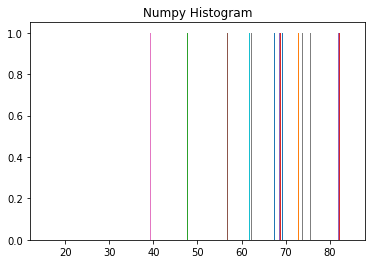

In [213]:
plt.hist(a, bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
plt.title("Numpy Histogram")
plt.show()
# Well this is not what I expected.

In [218]:
# From p. 51 in Data Science Projects with Python as example
# Create dummy variables for the 'age_years' column, so each five year bin is a binary value
# From https://youtu.be/0s_1IsROgDc
age_dummies = pd.get_dummies(df_4.age_years)
df_4 = pd.concat([df_4, age_dummies], axis = 1)
print(df_4)

       Grade I  Grade II  Grade III  Grade IV  age_years  clean_months3  \
0            0         1          0         0         55           77.0   
1            0         0          1         0         60           84.0   
3            1         0          0         0         55           90.0   
4            0         1          0         0         70           90.0   
5            1         0          0         0         65           90.0   
...        ...       ...        ...       ...        ...            ...   
57266        0         0          1         0         45           91.0   
57270        0         1          0         0         85           18.0   
57521        0         1          0         0         65           87.0   
57522        0         0          0         1         50           40.0   
57558        1         0          0         0         55           91.0   

            COD to site recode  Median household income inflation adj to 2018  \
0                 

In [230]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52912 entries, 0 to 57558
Data columns (total 52 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Grade I                                                                52912 non-null  uint8  
 1   Grade II                                                               52912 non-null  uint8  
 2   Grade III                                                              52912 non-null  uint8  
 3   Grade IV                                                               52912 non-null  uint8  
 4   age_years                                                              52912 non-null  int64  
 5   clean_months3                                                          52910 non-null  float64
 6   COD to site recode                                                     52912 non-null 

In [231]:
# Try changing column names.  Maybe numbers only won't work
#  Or maybe 'unstack' the column and add'age_' in front of ever column name
list(df_4.columns)
# The age columns are in there twice, and don't have ''s around them.

['Grade I',
 'Grade II',
 'Grade III',
 'Grade IV',
 'age_years',
 'clean_months3',
 'COD to site recode',
 'Median household income inflation adj to 2018',
 'Rural-Urban Continuum Code',
 'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total',
 'Breast Subtype (2010+)',
 'CS extension (2004-2015)',
 'CS lymph nodes (2004-2015)',
 'CS mets at dx (2004-2015)',
 'CS Tumor Size/Ext Eval (2004-2015)',
 'CS Reg Node Eval (2004-2015)',
 'CS Mets Eval (2004-2015)',
 'Patient ID',
 'Primary Site - labeled',
 'Grade',
 'Five_Year_Survival',
 'Urban',
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85]

In [233]:
# Rename the age columns and put quotes around them.  Will delete the duplicates in the next step
df_4.columns = ['Grade I','Grade II','Grade III','Grade IV','age_years','clean_months3','COD to site recode',
 'Median household income inflation adj to 2018','Rural-Urban Continuum Code',
 'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total','Breast Subtype (2010+)',
 'CS extension (2004-2015)','CS lymph nodes (2004-2015)','CS mets at dx (2004-2015)','CS Tumor Size/Ext Eval (2004-2015)',
 'CS Reg Node Eval (2004-2015)','CS Mets Eval (2004-2015)','Patient ID','Primary Site - labeled','Grade',
 'Five_Year_Survival','Urban','age_15','age_20','age_25','age_30','age_35','age_40','age_45','age_50','age_55','age_60',
 'age_65','age_70','age_75','age_80','age_85','cage_15','cage_20','cage_25','cage_30','cage_35','cage_40','cage_45',
 'cage_50','cage_55','cage_60','cage_65','cage_70','cage_75','cage_80','cage_85']
df_4.head

<bound method NDFrame.head of        Grade I  Grade II  Grade III  Grade IV  age_years  clean_months3  \
0            0         1          0         0         55           77.0   
1            0         0          1         0         60           84.0   
3            1         0          0         0         55           90.0   
4            0         1          0         0         70           90.0   
5            1         0          0         0         65           90.0   
...        ...       ...        ...       ...        ...            ...   
57266        0         0          1         0         45           91.0   
57270        0         1          0         0         85           18.0   
57521        0         1          0         0         65           87.0   
57522        0         0          0         1         50           40.0   
57558        1         0          0         0         55           91.0   

            COD to site recode  Median household income inflation adj

In [234]:
# Drop the duplicate columns (which I gave alternate names)
df_6 = df_4.drop(['cage_15','cage_20','cage_25','cage_30','cage_35','cage_40','cage_45','cage_50','cage_55','cage_60',
 'cage_65','cage_70','cage_75','cage_80','cage_85'], axis=1)
df_6.head()

,Grade I,Grade II,Grade III,Grade IV,age_years,clean_months3,COD to site recode,Median household income inflation adj to 2018,Rural-Urban Continuum Code,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total",Breast Subtype (2010+),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),Patient ID,Primary Site - labeled,Grade,Five_Year_Survival,Urban,age_15,age_20,age_25,age_30,age_35,age_40,age_45,age_50,age_55,age_60,age_65,age_70,age_75,age_80,age_85
0,0,1,0,0,55,77.0,Alive,50,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44761706,C50.4-Upper-outer quadrant of breast,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,60,84.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic Asian or Pacific Islander,HR+/HER2+ (Luminal B),100,000,00,3,0,0,1186324,"C50.9-Breast, NOS",3,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,55,90.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,23289590,C50.4-Upper-outer quadrant of breast,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,70,90.0,Alive,65,"Counties in metropolitan areas of 250,000 to 1...",Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,1,0,0,6222708,C50.4-Upper-outer quadrant of breast,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,65,90.0,Alive,75,Counties in metropolitan areas ge 1 million pop,Non-Hispanic White,HR+/HER2+ (Luminal B),100,000,00,3,0,0,44270799,C50.4-Upper-outer quadrant of breast,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [235]:
# What data types are the age columns now?
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52912 entries, 0 to 57558
Data columns (total 37 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Grade I                                                                52912 non-null  uint8  
 1   Grade II                                                               52912 non-null  uint8  
 2   Grade III                                                              52912 non-null  uint8  
 3   Grade IV                                                               52912 non-null  uint8  
 4   age_years                                                              52912 non-null  int64  
 5   clean_months3                                                          52910 non-null  float64
 6   COD to site recode                                                     52912 non-null 

## Part 3 - Visualize Data

Easily 90% of the time spent on this project was on obtaining and cleaning the data set.  While this is valuable experience, unless the goal of the project is to demonstrate data preparation skills, I would recommend against using a raw research data set in the future when cleaned up versions are available!

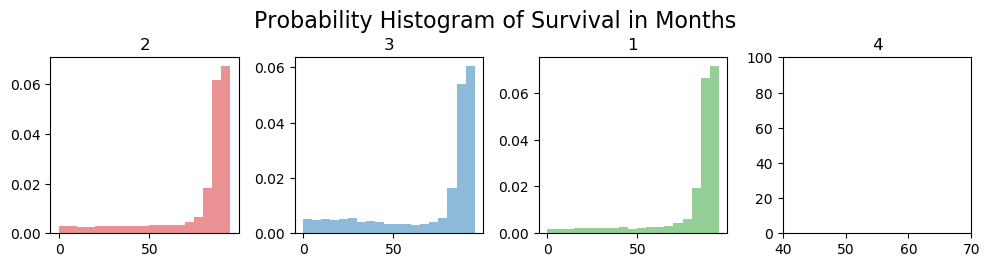

In [246]:
# From https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
# Draw one histogram of months survived for each category of Grade of cancer.

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,2.5), dpi=100)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, Grade) in enumerate(zip(axes.flatten(), df_6.Grade.unique())):
    x = df_6.loc[df_6.Grade==Grade, 'clean_months3']
    ax.hist(x, alpha=0.5, bins=19, density=True, stacked=True, label=str(Grade), color=colors[i])
    ax.set_title(Grade)

plt.suptitle('Probability Histogram of Survival in Months', y=1.05, size=16)
ax.set_xlim(40, 70); ax.set_ylim(0, 100);
plt.tight_layout();

# This isn't quite right.

In [248]:
# Groupby: survival months median
survivors = df_6[['Grade', 'clean_months3']].groupby('Grade').median().round(2)
survivors
# This does not pass the 'sniff test.'  There should be greater differentiation in survival time among the cancer stages.

,clean_months3
Grade,
1,87.0
2,87.0
3,86.0
4,84.0


In [256]:
clean_months3 = df_6.clean_months3
print(clean_months3)

0        77.0
1        84.0
3        90.0
4        90.0
5        90.0
         ... 
57266    91.0
57270    18.0
57521    87.0
57522    40.0
57558    91.0
Name: clean_months3, Length: 52912, dtype: float64


In [270]:
import matplotlib.pyplot as plt
%matplotlib inline

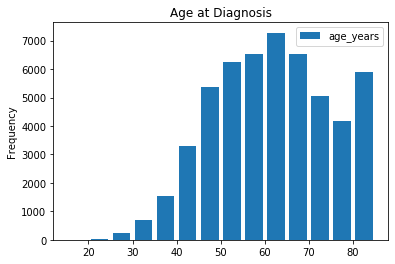

In [275]:
df_6[['age_years']].plot(kind='hist',bins=[15,20,25,30,35,40,45,50,55,60,65,70,75,80,85], rwidth=0.8)
plt.title("Age at Diagnosis")
plt.show()
# Remember, the 85-90 group is actually 85+.  But still, why so many more diagnoses at that oldest age?
# Are some of these women who present 'at death's door' and get a cancer diagnosis right before death (from old age or...)?

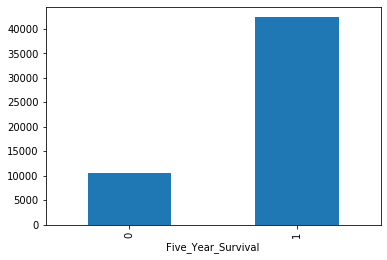

In [279]:
df_6.groupby('Five_Year_Survival')['Grade'].count().plot(kind='bar')
plt.show()
# Not what I expected

(array([   27.,   233.,  2230.,  3309.,  5376., 12767.,  7279., 11612.,
         4184.,  5895.]),
 array([15., 22., 29., 36., 43., 50., 57., 64., 71., 78., 85.]),
 <a list of 10 Patch objects>)

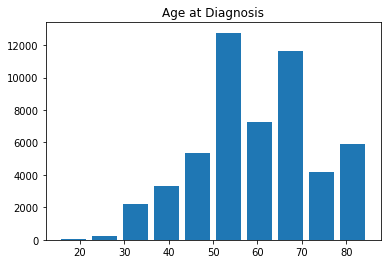

In [291]:
# from https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist
counts, bins = np.histogram(df_6.age_years)
plt.title("Age at Diagnosis")
plt.hist(bins[:-1], bins, weights=counts, rwidth=0.8)

# This is the age at time of diagnosis, in five year bins

Text(0, 0.5, 'Number of Women')

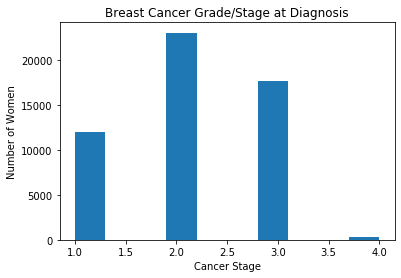

In [318]:
counts, bins = np.histogram(df_6.Grade)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Breast Cancer Grade/Stage at Diagnosis')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Women')

## Part 4 - Calculations

In [313]:
# What about the mean survival months?    Groupby: survival months mean
mean_survivors = df_6[['Grade', 'clean_months3']].groupby('Grade').mean().round(2)
mean_survivors
# That is starting to look a little more intuitive.  Better than grouping by median, that's for sure.

,clean_months3
Grade,
1,79.92
2,77.20
3,71.10
4,65.28


I’m sure any serious researcher would have examined this dataset with and without the presence of women who died with cause of death listed as something other than breast cancer.  I believe this mean is essentially meaningless for two reasons; 1. It does not distinguish between women who pursued treatment and those who did not (and even which type of treatment, and 2. It does not distinguish between survival time that ended due to breast cancer or due to some other diagnosis.
So at best, the mean life expectancy based on stage/grade of breast cancer from this dataset could be used as a general understanding of what is currently occurring in the field of breast cancer treatment.  It cannot be used for prediction or even responsibly used for classification of outcome (in terms of five-year-survival) due to the missing feature of medical interventions (or treatments).

In [294]:
list(df_6.columns)

['Grade I',
 'Grade II',
 'Grade III',
 'Grade IV',
 'age_years',
 'clean_months3',
 'COD to site recode',
 'Median household income inflation adj to 2018',
 'Rural-Urban Continuum Code',
 'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total',
 'Breast Subtype (2010+)',
 'CS extension (2004-2015)',
 'CS lymph nodes (2004-2015)',
 'CS mets at dx (2004-2015)',
 'CS Tumor Size/Ext Eval (2004-2015)',
 'CS Reg Node Eval (2004-2015)',
 'CS Mets Eval (2004-2015)',
 'Patient ID',
 'Primary Site - labeled',
 'Grade',
 'Five_Year_Survival',
 'Urban',
 'age_15',
 'age_20',
 'age_25',
 'age_30',
 'age_35',
 'age_40',
 'age_45',
 'age_50',
 'age_55',
 'age_60',
 'age_65',
 'age_70',
 'age_75',
 'age_80',
 'age_85']

In [312]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52912 entries, 0 to 57558
Data columns (total 37 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Grade I                                                                52912 non-null  uint8  
 1   Grade II                                                               52912 non-null  uint8  
 2   Grade III                                                              52912 non-null  uint8  
 3   Grade IV                                                               52912 non-null  uint8  
 4   age_years                                                              52912 non-null  int64  
 5   clean_months3                                                          52910 non-null  float64
 6   COD to site recode                                                     52912 non-null 

In [296]:
# Need a smaller dataframe, with only the numerical data for the k-means clustering
mini_df = df_6.drop(['Grade I','Grade II','Grade III','Grade IV','COD to site recode','Rural-Urban Continuum Code',
 'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic) - no total','Breast Subtype (2010+)',
 'CS extension (2004-2015)','CS lymph nodes (2004-2015)','CS mets at dx (2004-2015)','CS Reg Node Eval (2004-2015)',
 'CS Mets Eval (2004-2015)','Patient ID','Primary Site - labeled','Urban','age_15','age_20','age_25','age_30','age_35',
 'age_40','age_45','age_50','age_55','age_60','age_65','age_70','age_75','age_80','age_85'], axis=1)
mini_df.head()

,age_years,clean_months3,Median household income inflation adj to 2018,CS Tumor Size/Ext Eval (2004-2015),Grade,Five_Year_Survival
0,55,77.0,50,3,2,1
1,60,84.0,75,3,3,1
3,55,90.0,75,3,1,1
4,70,90.0,65,1,2,1
5,65,90.0,75,3,1,1


In [299]:
mini_df2 = mini_df

In [302]:
# See which columns have null values
pd.isnull(mini_df2).sum() > 0

age_years                                        False
clean_months3                                     True
Median household income inflation adj to 2018    False
CS Tumor Size/Ext Eval (2004-2015)               False
Grade                                            False
Five_Year_Survival                               False
dtype: bool

In [303]:
# Remove all rows where the value of clean_months3 is NA
mini_df2 = mini_df2[mini_df2['clean_months3'].notna()]
mini_df2.head()

,age_years,clean_months3,Median household income inflation adj to 2018,CS Tumor Size/Ext Eval (2004-2015),Grade,Five_Year_Survival
0,55,77.0,50,3,2,1
1,60,84.0,75,3,3,1
3,55,90.0,75,3,1,1
4,70,90.0,65,1,2,1
5,65,90.0,75,3,1,1


C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Clusters and with SSE Values
----------------------------------------
Clusters: 1 	SSE: 50771977.47601588
Clusters: 2 	SSE: 22045788.03472318
Clusters: 3 	SSE: 17164989.099577904
Clusters: 4 	SSE: 14165651.982683243
Clusters: 5 	SSE: 11826080.192597708
Clusters: 6 	SSE: 10613296.39635255
Clusters: 7 	SSE: 9495519.096416226
Clusters: 8 	SSE: 8816901.351838812
Clusters: 9 	SSE: 8053349.996022645
Clusters: 10 	SSE: 7581046.302431691


C:\Users\Branch\Anaconda3\anaconda_mess\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


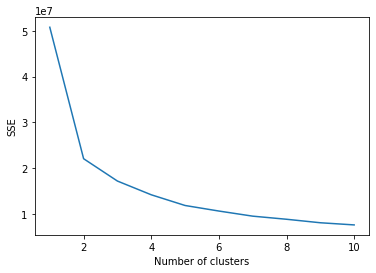

In [304]:
# k-means clustering
# Referenced from https://stackoverflow.com/questions/19197715/sckit-learn-k-means-elbow-criterion for most of the coding
# and https://github.com/hevronig/ca4ls/blob/105e2f234ea46f3e64c0a823c998eb9fecc3da4b/gap.py

from sklearn.cluster import KMeans
import traceback

def sse_form(mini_df2, n):                            # Function to perform Kmeans using data and number of clusters
    sse = {}
    for k in range(1, n+1):
        kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(mini_df2)
        mini_df2["clusters"] = kmeans.labels_
        sse[k] = kmeans.inertia_                  # Inertia: Sum of distances of samples to their closest cluster center
    return(sse)

def sse_pretty(sse_values):                       # Function to print results of clusters and SSE values
    print('Clusters and with SSE Values')
    print('-'*40)
    for k,v in sse_values.items():
        print('Clusters: {} \tSSE: {}'.format(k,v))
        
def elbow_plt(sse):                               # Function to create the plot for elbow
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()
   

def main():                                       # load the data, call all the functions, perform exception handling
    try:
        #iris = load_iris()
        #df = pd.DataFrame(iris.data, columns=iris['feature_names'])
        k = 10
        # Pulling in other functions
        sse_values = sse_form(mini_df2, k)              # Calling first function
        sse_pretty(sse_values)                    # Calling second function
        elbow_plt(sse_values)                     # Calling third function
    except Exception as exception:
        print('exception')
        traceback.print_exc()
        print('An exception of type{0} occurred.'.format(type(exception).__name__, exception.args));
main()
# Although I got a billion error statements, the 'elbow' here is clear.  It hinges at two clusters.

At this point I decided to look externally for validation of my model, since I'm pretty sure mine was incorrect.  I believe I have a serious overfitting problem from too many features and noise within the dataset.  There must be enough differentiation among the grades to support more than two clusters!!  This was a big clue that there is something wrong with my model.  I knew going in that there are four ‘stages’ or grades of cancer upon diagnosis.  The medical community doesn’t just pick a number.  There are standards.
I don't think there is a way to responsibly classify survivability based on initial presentation.  Quality, method, and timeliness of treatments need to be included.  A more reasonable classification project (if not including treatments) would be to use 'malignant' and 'benign' as the initial binary classifier target variables, because that decision is made before and regardless of treatment decisions.